In [2]:
import xarray as xr
import pandas as pd
import os

# Paths
file_path = "/Users/touqeergill/Desktop/hitu_2010-2024.nc"
excel_output_path = "/Users/touqeergill/Desktop/hitu_2010-2024.xlsx"
csv_folder_path = "/Users/touqeergill/Desktop/hitu_2010-2024_csv"

# Create folder for large CSVs
os.makedirs(csv_folder_path, exist_ok=True)

# Load dataset
ds = xr.open_dataset(file_path)

with pd.ExcelWriter(excel_output_path) as writer:
    for var in ds.data_vars:
        df = ds[var].to_pandas()

        if df.shape[1] <= 16000:  # Safe limit for Excel
            df.to_excel(writer, sheet_name=var[:31])
        else:
            csv_path = os.path.join(csv_folder_path, f"{var}.csv")
            df.to_csv(csv_path)
            print(f"{var} too large for Excel; saved to CSV instead.")

print(f"\n✅ Conversion complete.\nExcel: {excel_output_path}\nCSVs (if any): {csv_folder_path}")

neg_ions too large for Excel; saved to CSV instead.
neg_particles too large for Excel; saved to CSV instead.
pos_ions too large for Excel; saved to CSV instead.
pos_particles too large for Excel; saved to CSV instead.

✅ Conversion complete.
Excel: /Users/touqeergill/Desktop/hitu_2010-2024.xlsx
CSVs (if any): /Users/touqeergill/Desktop/hitu_2010-2024_csv


In [3]:
import xarray as xr

# Local path to your NetCDF file
file_path = "/Users/touqeergill/Desktop/hitu_2010-2024.nc"

# Open the dataset
ds = xr.open_dataset(file_path)

# Print variable names (optional, helps you see what’s inside)
print("Variables:", list(ds.data_vars))

# Check if 'time' is a coordinate
if 'time' in ds.coords:
    # Print time range
    print("Time range:", ds['time'].values.min(), "to", ds['time'].values.max())
else:
    print("'time' coordinate not found in dataset.")

Variables: ['neg_ions', 'neg_particles', 'pos_ions', 'pos_particles']
Time range: 2009-03-12T15:50:00.000000000 to 2024-02-25T22:00:00.000000000


In [4]:
import xarray as xr
import os
import pandas as pd

# Load the dataset
file_path = "/Users/touqeergill/Desktop/hitu_2010-2024.nc"
output_dir = "/Users/touqeergill/Desktop/hitu_split_by_year"
os.makedirs(output_dir, exist_ok=True)

# Open dataset
ds = xr.open_dataset(file_path)

# Ensure 'time' is present
if 'time' not in ds.coords:
    raise ValueError("The dataset does not contain a 'time' coordinate.")

# Convert time to pandas datetime index for easier filtering
ds['time'] = pd.to_datetime(ds['time'].values)
years = pd.DatetimeIndex(ds['time'].values).year.unique()

# Split and save by year
for year in years:
    yearly_ds = ds.sel(time=str(year))
    output_path = os.path.join(output_dir, f"hitu_{year}.nc")
    yearly_ds.to_netcdf(output_path)
    print(f"Saved: {output_path}")

Saved: /Users/touqeergill/Desktop/hitu_split_by_year/hitu_2009.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_year/hitu_2010.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_year/hitu_2011.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_year/hitu_2012.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_year/hitu_2013.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_year/hitu_2014.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_year/hitu_2015.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_year/hitu_2016.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_year/hitu_2017.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_year/hitu_2018.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_year/hitu_2019.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_year/hitu_2020.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_year/hitu_2021.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_year/hitu_2022.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_year/hitu_2023.nc
Saved: /Us

In [6]:
import xarray as xr
import os
import pandas as pd

# Load the dataset
file_path = "/Users/touqeergill/Desktop/hitu_2010-2024.nc"
output_dir = "/Users/touqeergill/Desktop/hitu_split_by_month"
os.makedirs(output_dir, exist_ok=True)

# Open dataset
ds = xr.open_dataset(file_path)

# Ensure 'time' is present
if 'time' not in ds.coords:
    raise ValueError("The dataset does not contain a 'time' coordinate.")

# Convert time to pandas datetime index
ds['time'] = pd.to_datetime(ds['time'].values)
df_time = pd.DatetimeIndex(ds['time'].values)

# Loop through each (year, month) pair
for year in df_time.year.unique():
    for month in range(1, 13):
        # Select data for this year and month
        time_str = f"{year}-{month:02d}"
        monthly_ds = ds.sel(time=ds['time'].dt.strftime('%Y-%m') == time_str)
        
        if monthly_ds.time.size > 0:  # Only save if data exists for that month
            output_filename = f"hitu_{year}_{month:02d}.nc"
            output_path = os.path.join(output_dir, output_filename)
            monthly_ds.to_netcdf(output_path)
            print(f"Saved: {output_path}")

Saved: /Users/touqeergill/Desktop/hitu_split_by_month/hitu_2009_03.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_month/hitu_2009_04.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_month/hitu_2009_05.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_month/hitu_2009_06.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_month/hitu_2009_07.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_month/hitu_2009_08.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_month/hitu_2009_09.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_month/hitu_2009_10.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_month/hitu_2009_11.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_month/hitu_2009_12.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_month/hitu_2010_01.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_month/hitu_2010_02.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_month/hitu_2010_03.nc
Saved: /Users/touqeergill/Desktop/hitu_split_by_month/hitu_2010_04.nc
Saved: /Users/touqee

In [8]:
import xarray as xr
import pandas as pd
import os

# Folder containing all monthly NetCDF files
input_dir = "/Users/touqeergill/Desktop/hitu_split_by_month"
output_dir = "/Users/touqeergill/Desktop/hitu_excel_by_month"
os.makedirs(output_dir, exist_ok=True)

# Loop through all NetCDF files in sorted order
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith(".nc") and filename.startswith("hitu_"):
        file_path = os.path.join(input_dir, filename)
        output_filename = filename.replace(".nc", ".xlsx")
        output_path = os.path.join(output_dir, output_filename)

        try:
            # Open dataset
            ds = xr.open_dataset(file_path)

            # Write to Excel
            with pd.ExcelWriter(output_path) as writer:
                for var in ds.data_vars:
                    df = ds[var].to_pandas()
                    df.to_excel(writer, sheet_name=var[:31])  # Limit sheet name to 31 characters

            print(f"✅ Excel file saved: {output_path}")

        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")

✅ Excel file saved: /Users/touqeergill/Desktop/hitu_excel_by_month/hitu_2009_03.xlsx
✅ Excel file saved: /Users/touqeergill/Desktop/hitu_excel_by_month/hitu_2009_04.xlsx
✅ Excel file saved: /Users/touqeergill/Desktop/hitu_excel_by_month/hitu_2009_05.xlsx
✅ Excel file saved: /Users/touqeergill/Desktop/hitu_excel_by_month/hitu_2009_06.xlsx
✅ Excel file saved: /Users/touqeergill/Desktop/hitu_excel_by_month/hitu_2009_07.xlsx
✅ Excel file saved: /Users/touqeergill/Desktop/hitu_excel_by_month/hitu_2009_08.xlsx
✅ Excel file saved: /Users/touqeergill/Desktop/hitu_excel_by_month/hitu_2009_09.xlsx
✅ Excel file saved: /Users/touqeergill/Desktop/hitu_excel_by_month/hitu_2009_10.xlsx
✅ Excel file saved: /Users/touqeergill/Desktop/hitu_excel_by_month/hitu_2009_11.xlsx
✅ Excel file saved: /Users/touqeergill/Desktop/hitu_excel_by_month/hitu_2009_12.xlsx
✅ Excel file saved: /Users/touqeergill/Desktop/hitu_excel_by_month/hitu_2010_01.xlsx
✅ Excel file saved: /Users/touqeergill/Desktop/hitu_excel_by_mont

In [9]:
import pandas as pd

# Define the path to your input and output Excel files
input_file_path = "/Users/touqeergill/Desktop/hitu_2009_03.xlsx"
output_file_path = "/Users/touqeergill/Desktop/hitu_2009_03_transposed.xlsx"

# Load the Excel file
xls = pd.ExcelFile(input_file_path)

# Dictionary to store transposed data
transposed_data = {}

# Transpose data from all sheets
for sheet_name in xls.sheet_names:
    # Read the sheet into a DataFrame
    df = xls.parse(sheet_name)
    
    # Transpose the DataFrame
    transposed_df = df.transpose()
    
    # Store in the dictionary
    transposed_data[sheet_name] = transposed_df

# Save each transposed sheet into a new Excel file
with pd.ExcelWriter(output_file_path) as writer:
    for sheet_name, transposed_df in transposed_data.items():
        transposed_df.to_excel(writer, sheet_name=sheet_name)

print("Transposed Excel file has been saved at:", output_file_path)

Transposed Excel file has been saved at: /Users/touqeergill/Desktop/hitu_2009_03_transposed.xlsx


In [11]:
import pandas as pd
import os

# Input and output folder paths
input_folder = "/Users/touqeergill/Desktop/hitu_excel_by_month"
output_folder = "/Users/touqeergill/Desktop/hitu_excel_transposed"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get a sorted list of all Excel files in the input folder
all_files = sorted(f for f in os.listdir(input_folder) if f.endswith(".xlsx"))

# Define the start and end file names
start_file = "hitu_2009_03.xlsx"
end_file = "hitu_2024_02.xlsx"

# Filter files in the desired range
process_files = []
start_found = False
for file in all_files:
    if file == start_file:
        start_found = True
    if start_found:
        process_files.append(file)
    if file == end_file:
        break

# Process and transpose each file
for file in process_files:
    input_path = os.path.join(input_folder, file)
    output_path = os.path.join(output_folder, file.replace(".xlsx", "_transposed.xlsx"))
    
    xls = pd.ExcelFile(input_path)
    
    with pd.ExcelWriter(output_path) as writer:
        for sheet_name in xls.sheet_names:
            df = xls.parse(sheet_name)
            df.T.to_excel(writer, sheet_name=sheet_name)
    
    print(f"Transposed and saved: {output_path}")

print("✅ All files have been transposed and saved to the new folder.")

Transposed and saved: /Users/touqeergill/Desktop/hitu_excel_transposed/hitu_2009_03_transposed.xlsx
Transposed and saved: /Users/touqeergill/Desktop/hitu_excel_transposed/hitu_2009_04_transposed.xlsx
Transposed and saved: /Users/touqeergill/Desktop/hitu_excel_transposed/hitu_2009_05_transposed.xlsx
Transposed and saved: /Users/touqeergill/Desktop/hitu_excel_transposed/hitu_2009_06_transposed.xlsx
Transposed and saved: /Users/touqeergill/Desktop/hitu_excel_transposed/hitu_2009_07_transposed.xlsx
Transposed and saved: /Users/touqeergill/Desktop/hitu_excel_transposed/hitu_2009_08_transposed.xlsx
Transposed and saved: /Users/touqeergill/Desktop/hitu_excel_transposed/hitu_2009_09_transposed.xlsx
Transposed and saved: /Users/touqeergill/Desktop/hitu_excel_transposed/hitu_2009_10_transposed.xlsx
Transposed and saved: /Users/touqeergill/Desktop/hitu_excel_transposed/hitu_2009_11_transposed.xlsx
Transposed and saved: /Users/touqeergill/Desktop/hitu_excel_transposed/hitu_2009_12_transposed.xlsx


In [12]:
import pandas as pd
import os
from pathlib import Path

# Define input and output directories
input_dir = Path("/Users/touqeergill/Desktop/hitu_excel_transposed")
output_dir = Path("/Users/touqeergill/Desktop/hitu_excel_transposed_cleaned")
output_dir.mkdir(parents=True, exist_ok=True)  # Create output directory if it doesn't exist

# Define filename range
start_file = "hitu_2009_03_transposed.xlsx"
end_file = "hitu_2024_02_transposed.xlsx"

# Get list of files sorted
excel_files = sorted([f for f in input_dir.glob("hitu_2009_*_transposed.xlsx")])

# Filter files within the start and end filename
start_index = excel_files.index(input_dir / start_file)
end_index = excel_files.index(input_dir / end_file) + 1
target_files = excel_files[start_index:end_index]

# Process each file
for file_path in target_files:
    print(f"🔄 Processing: {file_path.name}")
    xls = pd.ExcelFile(file_path)
    processed_data = {}

    for sheet_name in xls.sheet_names:
        df = xls.parse(sheet_name, header=None)
        df = df.drop(index=0)
        df.columns = df.iloc[0]
        df = df.drop(df.index[0])
        df.columns = [str(col).replace("diameter", "Date") for col in df.columns]
        processed_data[sheet_name] = df.reset_index(drop=True)

    # Define output path
    output_file = output_dir / file_path.name

    # Save processed file
    with pd.ExcelWriter(output_file) as writer:
        for sheet_name, df in processed_data.items():
            df.to_excel(writer, sheet_name=sheet_name, index=False)

    print(f"✅ Saved: {output_file}")

print("🎉 All matching files have been processed and saved.")

ValueError: PosixPath('/Users/touqeergill/Desktop/hitu_excel_transposed/hitu_2024_02_transposed.xlsx') is not in list

In [13]:
import pandas as pd
from pathlib import Path

# Define input and output directories
input_dir = Path("/Users/touqeergill/Desktop/hitu_excel_transposed")
output_dir = Path("/Users/touqeergill/Desktop/hitu_excel_transposed_cleaned")
output_dir.mkdir(parents=True, exist_ok=True)

# Define date range as (start, end)
start_date = "2009_03"
end_date = "2024_02"

# Get all matching files and filter by date string
excel_files = sorted([
    f for f in input_dir.glob("hitu_*_transposed.xlsx")
    if start_date <= f.name[5:12] <= end_date
])

# Process each file
for file_path in excel_files:
    print(f"🔄 Processing: {file_path.name}")
    xls = pd.ExcelFile(file_path)
    processed_data = {}

    for sheet_name in xls.sheet_names:
        df = xls.parse(sheet_name, header=None)
        df = df.drop(index=0)
        df.columns = df.iloc[0]
        df = df.drop(df.index[0])
        df.columns = [str(col).replace("diameter", "Date") for col in df.columns]
        processed_data[sheet_name] = df.reset_index(drop=True)

    # Define output path
    output_file = output_dir / file_path.name

    # Save processed file
    with pd.ExcelWriter(output_file) as writer:
        for sheet_name, df in processed_data.items():
            df.to_excel(writer, sheet_name=sheet_name, index=False)

    print(f"✅ Saved: {output_file}")

print("🎉 All matching files have been processed and saved.")

🔄 Processing: hitu_2009_03_transposed.xlsx
✅ Saved: /Users/touqeergill/Desktop/hitu_excel_transposed_cleaned/hitu_2009_03_transposed.xlsx
🔄 Processing: hitu_2009_04_transposed.xlsx
✅ Saved: /Users/touqeergill/Desktop/hitu_excel_transposed_cleaned/hitu_2009_04_transposed.xlsx
🔄 Processing: hitu_2009_05_transposed.xlsx
✅ Saved: /Users/touqeergill/Desktop/hitu_excel_transposed_cleaned/hitu_2009_05_transposed.xlsx
🔄 Processing: hitu_2009_06_transposed.xlsx
✅ Saved: /Users/touqeergill/Desktop/hitu_excel_transposed_cleaned/hitu_2009_06_transposed.xlsx
🔄 Processing: hitu_2009_07_transposed.xlsx
✅ Saved: /Users/touqeergill/Desktop/hitu_excel_transposed_cleaned/hitu_2009_07_transposed.xlsx
🔄 Processing: hitu_2009_08_transposed.xlsx
✅ Saved: /Users/touqeergill/Desktop/hitu_excel_transposed_cleaned/hitu_2009_08_transposed.xlsx
🔄 Processing: hitu_2009_09_transposed.xlsx
✅ Saved: /Users/touqeergill/Desktop/hitu_excel_transposed_cleaned/hitu_2009_09_transposed.xlsx
🔄 Processing: hitu_2009_10_transpo

In [ ]:
import os
import pandas as pd

# Define source and destination folder paths
source_folder = "/Users/touqeergill/Desktop/hitu_excel_transposed_cleaned"
destination_folder = "/Users/touqeergill/Desktop/negative ions"

# Create destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through files in the source directory
for filename in os.listdir(source_folder):
    # Check if the file matches the pattern
    if (
        filename.startswith("hitu_20") and 
        filename.endswith("_transposed.xlsx")
    ):
        source_path = os.path.join(source_folder, filename)
        try:
            xls = pd.ExcelFile(source_path)
            if 'neg_ions' in xls.sheet_names:
                # Read only the 'neg_ions' sheet
                neg_ions_df = pd.read_excel(xls, sheet_name='neg_ions')

                # Save to the new location
                destination_path = os.path.join(destination_folder, filename)
                neg_ions_df.to_excel(destination_path, sheet_name='neg_ions', index=False)
                print(f"✅ Processed: {filename}")
            else:
                print(f"⚠️ Skipped (no 'neg_ions' sheet): {filename}")
        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")

In [3]:
import os
import re
import pandas as pd
from datetime import datetime

# Define source and destination folder paths
source_folder = "/Users/touqeergill/Desktop/hitu_excel_transposed_cleaned"
destination_folder = "/Users/touqeergill/Desktop/negative ions"

# Create destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Pattern to match filenames like 'hitu_2023_01_transposed.xlsx'
file_pattern = re.compile(r"hitu_(\d{4})_(\d{2})_transposed\.xlsx")

# List and sort matching files by date
files_with_dates = []
for filename in os.listdir(source_folder):
    match = file_pattern.match(filename)
    if match:
        year, month = match.groups()
        file_date = datetime(int(year), int(month), 1)
        files_with_dates.append((file_date, filename))

# Sort files by date
files_with_dates.sort()

# Process each file
for file_date, filename in files_with_dates:
    source_path = os.path.join(source_folder, filename)
    try:
        xls = pd.ExcelFile(source_path)
        if 'neg_ions' in xls.sheet_names:
            neg_ions_df = pd.read_excel(xls, sheet_name='neg_ions')
            destination_path = os.path.join(destination_folder, filename)
            neg_ions_df.to_excel(destination_path, sheet_name='neg_ions', index=False)
            print(f"✅ Processed: {filename}")
        else:
            print(f"⚠️ Skipped (no 'neg_ions' sheet): {filename}")
    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

✅ Processed: hitu_2009_03_transposed.xlsx
✅ Processed: hitu_2009_04_transposed.xlsx
✅ Processed: hitu_2009_05_transposed.xlsx
✅ Processed: hitu_2009_06_transposed.xlsx
✅ Processed: hitu_2009_07_transposed.xlsx
✅ Processed: hitu_2009_08_transposed.xlsx
✅ Processed: hitu_2009_09_transposed.xlsx
✅ Processed: hitu_2009_10_transposed.xlsx
✅ Processed: hitu_2009_11_transposed.xlsx
✅ Processed: hitu_2009_12_transposed.xlsx
✅ Processed: hitu_2010_01_transposed.xlsx
✅ Processed: hitu_2010_02_transposed.xlsx
✅ Processed: hitu_2010_03_transposed.xlsx
✅ Processed: hitu_2010_04_transposed.xlsx
✅ Processed: hitu_2010_05_transposed.xlsx
✅ Processed: hitu_2010_06_transposed.xlsx
✅ Processed: hitu_2010_07_transposed.xlsx
✅ Processed: hitu_2010_08_transposed.xlsx
✅ Processed: hitu_2010_09_transposed.xlsx
✅ Processed: hitu_2010_10_transposed.xlsx
✅ Processed: hitu_2010_11_transposed.xlsx
✅ Processed: hitu_2010_12_transposed.xlsx
✅ Processed: hitu_2011_01_transposed.xlsx
✅ Processed: hitu_2011_02_transpos

In [4]:
import os
import re
import pandas as pd
from datetime import datetime

# Define source and destination folder paths
source_folder = "/Users/touqeergill/Desktop/hitu_excel_transposed_cleaned"
destination_folder = "/Users/touqeergill/Desktop/positive ions"

# Create destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Pattern to match filenames like 'hitu_2023_01_transposed.xlsx'
file_pattern = re.compile(r"hitu_(\d{4})_(\d{2})_transposed\.xlsx")

# List and sort matching files by date
files_with_dates = []
for filename in os.listdir(source_folder):
    match = file_pattern.match(filename)
    if match:
        year, month = match.groups()
        file_date = datetime(int(year), int(month), 1)
        files_with_dates.append((file_date, filename))

# Sort files by date
files_with_dates.sort()

# Process each file
for file_date, filename in files_with_dates:
    source_path = os.path.join(source_folder, filename)
    try:
        xls = pd.ExcelFile(source_path)
        if 'pos_ions' in xls.sheet_names:
            pos_ions_df = pd.read_excel(xls, sheet_name='pos_ions')
            destination_path = os.path.join(destination_folder, filename)
            pos_ions_df.to_excel(destination_path, sheet_name='pos_ions', index=False)
            print(f"✅ Processed: {filename}")
        else:
            print(f"⚠️ Skipped (no 'pos_ions' sheet): {filename}")
    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

✅ Processed: hitu_2009_03_transposed.xlsx
✅ Processed: hitu_2009_04_transposed.xlsx
✅ Processed: hitu_2009_05_transposed.xlsx
✅ Processed: hitu_2009_06_transposed.xlsx
✅ Processed: hitu_2009_07_transposed.xlsx
✅ Processed: hitu_2009_08_transposed.xlsx
✅ Processed: hitu_2009_09_transposed.xlsx
✅ Processed: hitu_2009_10_transposed.xlsx
✅ Processed: hitu_2009_11_transposed.xlsx
✅ Processed: hitu_2009_12_transposed.xlsx
✅ Processed: hitu_2010_01_transposed.xlsx
✅ Processed: hitu_2010_02_transposed.xlsx
✅ Processed: hitu_2010_03_transposed.xlsx
✅ Processed: hitu_2010_04_transposed.xlsx
✅ Processed: hitu_2010_05_transposed.xlsx
✅ Processed: hitu_2010_06_transposed.xlsx
✅ Processed: hitu_2010_07_transposed.xlsx
✅ Processed: hitu_2010_08_transposed.xlsx
✅ Processed: hitu_2010_09_transposed.xlsx
✅ Processed: hitu_2010_10_transposed.xlsx
✅ Processed: hitu_2010_11_transposed.xlsx
✅ Processed: hitu_2010_12_transposed.xlsx
✅ Processed: hitu_2011_01_transposed.xlsx
✅ Processed: hitu_2011_02_transpos

In [5]:
import os
import re
import pandas as pd
from datetime import datetime

# Define source and destination folder paths
source_folder = "/Users/touqeergill/Desktop/hitu_excel_transposed_cleaned"
destination_folder = "/Users/touqeergill/Desktop/negative particles"

# Create destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Pattern to match filenames like 'hitu_2023_01_transposed.xlsx'
file_pattern = re.compile(r"hitu_(\d{4})_(\d{2})_transposed\.xlsx")

# List and sort matching files by date
files_with_dates = []
for filename in os.listdir(source_folder):
    match = file_pattern.match(filename)
    if match:
        year, month = match.groups()
        file_date = datetime(int(year), int(month), 1)
        files_with_dates.append((file_date, filename))

# Sort files by date
files_with_dates.sort()

# Process each file
for file_date, filename in files_with_dates:
    source_path = os.path.join(source_folder, filename)
    try:
        xls = pd.ExcelFile(source_path)
        if 'neg_particles' in xls.sheet_names:
            neg_particles_df = pd.read_excel(xls, sheet_name='neg_particles')
            destination_path = os.path.join(destination_folder, filename)
            neg_particles_df.to_excel(destination_path, sheet_name='neg_particles', index=False)
            print(f"✅ Processed: {filename}")
        else:
            print(f"⚠️ Skipped (no 'neg_particles' sheet): {filename}")
    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

✅ Processed: hitu_2009_03_transposed.xlsx
✅ Processed: hitu_2009_04_transposed.xlsx
✅ Processed: hitu_2009_05_transposed.xlsx
✅ Processed: hitu_2009_06_transposed.xlsx
✅ Processed: hitu_2009_07_transposed.xlsx
✅ Processed: hitu_2009_08_transposed.xlsx
✅ Processed: hitu_2009_09_transposed.xlsx
✅ Processed: hitu_2009_10_transposed.xlsx
✅ Processed: hitu_2009_11_transposed.xlsx
✅ Processed: hitu_2009_12_transposed.xlsx
✅ Processed: hitu_2010_01_transposed.xlsx
✅ Processed: hitu_2010_02_transposed.xlsx
✅ Processed: hitu_2010_03_transposed.xlsx
✅ Processed: hitu_2010_04_transposed.xlsx
✅ Processed: hitu_2010_05_transposed.xlsx
✅ Processed: hitu_2010_06_transposed.xlsx
✅ Processed: hitu_2010_07_transposed.xlsx
✅ Processed: hitu_2010_08_transposed.xlsx
✅ Processed: hitu_2010_09_transposed.xlsx
✅ Processed: hitu_2010_10_transposed.xlsx
✅ Processed: hitu_2010_11_transposed.xlsx
✅ Processed: hitu_2010_12_transposed.xlsx
✅ Processed: hitu_2011_01_transposed.xlsx
✅ Processed: hitu_2011_02_transpos

In [6]:
import os
import re
import pandas as pd
from datetime import datetime

# Define source and destination folder paths
source_folder = "/Users/touqeergill/Desktop/hitu_excel_transposed_cleaned"
destination_folder = "/Users/touqeergill/Desktop/positive particles"

# Create destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Pattern to match filenames like 'hitu_2023_01_transposed.xlsx'
file_pattern = re.compile(r"hitu_(\d{4})_(\d{2})_transposed\.xlsx")

# List and sort matching files by date
files_with_dates = []
for filename in os.listdir(source_folder):
    match = file_pattern.match(filename)
    if match:
        year, month = match.groups()
        file_date = datetime(int(year), int(month), 1)
        files_with_dates.append((file_date, filename))

# Sort files by date
files_with_dates.sort()

# Process each file
for file_date, filename in files_with_dates:
    source_path = os.path.join(source_folder, filename)
    try:
        xls = pd.ExcelFile(source_path)
        if 'pos_particles' in xls.sheet_names:
            pos_particles_df = pd.read_excel(xls, sheet_name='pos_particles')
            destination_path = os.path.join(destination_folder, filename)
            pos_particles_df.to_excel(destination_path, sheet_name='pos_particles', index=False)
            print(f"✅ Processed: {filename}")
        else:
            print(f"⚠️ Skipped (no 'pos_particles' sheet): {filename}")
    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

✅ Processed: hitu_2009_03_transposed.xlsx
✅ Processed: hitu_2009_04_transposed.xlsx
✅ Processed: hitu_2009_05_transposed.xlsx
✅ Processed: hitu_2009_06_transposed.xlsx
✅ Processed: hitu_2009_07_transposed.xlsx
✅ Processed: hitu_2009_08_transposed.xlsx
✅ Processed: hitu_2009_09_transposed.xlsx
✅ Processed: hitu_2009_10_transposed.xlsx
✅ Processed: hitu_2009_11_transposed.xlsx
✅ Processed: hitu_2009_12_transposed.xlsx
✅ Processed: hitu_2010_01_transposed.xlsx
✅ Processed: hitu_2010_02_transposed.xlsx
✅ Processed: hitu_2010_03_transposed.xlsx
✅ Processed: hitu_2010_04_transposed.xlsx
✅ Processed: hitu_2010_05_transposed.xlsx
✅ Processed: hitu_2010_06_transposed.xlsx
✅ Processed: hitu_2010_07_transposed.xlsx
✅ Processed: hitu_2010_08_transposed.xlsx
✅ Processed: hitu_2010_09_transposed.xlsx
✅ Processed: hitu_2010_10_transposed.xlsx
✅ Processed: hitu_2010_11_transposed.xlsx
✅ Processed: hitu_2010_12_transposed.xlsx
✅ Processed: hitu_2011_01_transposed.xlsx
✅ Processed: hitu_2011_02_transpos

In [ ]:
import pandas as pd
import os

# Directory containing all transposed Excel files
directory = '/Users/touqeergill/Desktop/negative ions'

# Define the start and end file names (inclusive)
start_file = "hitu_2009_03_transposed.xlsx"
end_file = "hitu_2024_02_transposed.xlsx"

# List and sort all Excel files in the directory
all_files = sorted(f for f in os.listdir(directory) if f.endswith("_transposed.xlsx"))

# Filter files between start and end (inclusive)
filtered_files = [f for f in all_files if start_file <= f <= end_file]

# Load each filtered file into a DataFrame
data_frames = []
for file in filtered_files:
    full_path = os.path.join(directory, file)
    df = pd.read_excel(full_path)
    data_frames.append(df)

# Combine all data
nais_data_combined = pd.concat(data_frames, ignore_index=True)

# Output path for the combined Excel file
output_file = os.path.join(directory, "NAIS_Combined_2009_2024.xlsx")

# Save to Excel
nais_data_combined.to_excel(output_file, index=False, engine='openpyxl')

# Confirmation message
print(f"NAIS full data (2009–2024) successfully saved to:\n{output_file}")

In [ ]:
import pandas as pd
import os

# Directory containing all transposed Excel files for positive ions
directory = '/Users/touqeergill/Desktop/positive ions'

# Define the start and end file names (inclusive)
start_file = "hitu_2009_03_transposed.xlsx"
end_file = "hitu_2024_02_transposed.xlsx"

# List and sort all Excel files in the directory
all_files = sorted(
    f for f in os.listdir(directory) 
    if f.endswith("_transposed.xlsx")
)

# Filter files between start and end (inclusive)
filtered_files = [f for f in all_files if start_file <= f <= end_file]

# Print how many files matched (optional)
print(f"Found {len(filtered_files)} files to merge.")

# Load each filtered file into a DataFrame
data_frames = []
for file in filtered_files:
    full_path = os.path.join(directory, file)
    df = pd.read_excel(full_path)
    data_frames.append(df)

# Combine all data
positive_ions_combined = pd.concat(data_frames, ignore_index=True)

# Output path for the combined Excel file
output_file = os.path.join(directory, "Positive_Ions_Combined_2009_2024.xlsx")

# Save to Excel using xlsxwriter engine (recommended for large files)
positive_ions_combined.to_excel(output_file, index=False, engine='xlsxwriter')

# Confirmation message
print(f"✅ Positive ion data (2009–2024) successfully saved to:\n{output_file}")

In [1]:
import pandas as pd
import os

# Directory containing all transposed Excel files for positive ions
directory = '/Users/touqeergill/Desktop/negative particles'

# Define the start and end file names (inclusive)
start_file = "hitu_2009_03_transposed.xlsx"
end_file = "hitu_2024_02_transposed.xlsx"

# List and sort all Excel files in the directory
all_files = sorted(
    f for f in os.listdir(directory) 
    if f.endswith("_transposed.xlsx")
)

# Filter files between start and end (inclusive)
filtered_files = [f for f in all_files if start_file <= f <= end_file]

# Print how many files matched (optional)
print(f"Found {len(filtered_files)} files to merge.")

# Load each filtered file into a DataFrame
data_frames = []
for file in filtered_files:
    full_path = os.path.join(directory, file)
    df = pd.read_excel(full_path)
    data_frames.append(df)

# Combine all data
positive_ions_combined = pd.concat(data_frames, ignore_index=True)

# Output path for the combined Excel file
output_file = os.path.join(directory, "Negative_Particles_Combined_2009_2024.xlsx")

# Save to Excel using xlsxwriter engine (recommended for large files)
positive_ions_combined.to_excel(output_file, index=False, engine='xlsxwriter')

# Confirmation message
print(f"✅ Negative particles data (2009–2024) successfully saved to:\n{output_file}")

Found 180 files to merge.
✅ Negative particles data (2009–2024) successfully saved to:
/Users/touqeergill/Desktop/negative particles/Negative_Particles_Combined_2009_2024.xlsx


In [2]:
import pandas as pd
import os

# Directory containing all transposed Excel files for positive ions
directory = '/Users/touqeergill/Desktop/positive particles'

# Define the start and end file names (inclusive)
start_file = "hitu_2009_03_transposed.xlsx"
end_file = "hitu_2024_02_transposed.xlsx"

# List and sort all Excel files in the directory
all_files = sorted(
    f for f in os.listdir(directory) 
    if f.endswith("_transposed.xlsx")
)

# Filter files between start and end (inclusive)
filtered_files = [f for f in all_files if start_file <= f <= end_file]

# Print how many files matched (optional)
print(f"Found {len(filtered_files)} files to merge.")

# Load each filtered file into a DataFrame
data_frames = []
for file in filtered_files:
    full_path = os.path.join(directory, file)
    df = pd.read_excel(full_path)
    data_frames.append(df)

# Combine all data
positive_ions_combined = pd.concat(data_frames, ignore_index=True)

# Output path for the combined Excel file
output_file = os.path.join(directory, "Positive_Particles_Combined_2009_2024.xlsx")

# Save to Excel using xlsxwriter engine (recommended for large files)
positive_ions_combined.to_excel(output_file, index=False, engine='xlsxwriter')

# Confirmation message
print(f"✅ Positive particles data (2009–2024) successfully saved to:\n{output_file}")

Found 180 files to merge.
✅ Positive particles data (2009–2024) successfully saved to:
/Users/touqeergill/Desktop/positive particles/Positive_Particles_Combined_2009_2024.xlsx


In [3]:
import pandas as pd
import os

# Define the file path and name
file_path = '/Users/touqeergill/Desktop/negative ions_2009_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path)

# Use the first column as the date column by position
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])

# Set the date column as the index
df.set_index(df.columns[0], inplace=True)

# Calculate the hourly average across columns B to AM
hourly_average = df.resample('H').mean()

# Save the result to a new Excel file
output_file = os.path.join('/Users/touqeergill/Desktop', 'Hourly_Averages.xlsx')
hourly_average.to_excel(output_file)

print(f'Hourly average data saved to {output_file}')

Hourly average data saved to /Users/touqeergill/Desktop/Hourly_Averages.xlsx


In [4]:
import pandas as pd
import os

# Define the file path and name
file_path = '/Users/touqeergill/Desktop/Positive_Ions_Combined_2009_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path)

# Use the first column as the date column by position
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])

# Set the date column as the index
df.set_index(df.columns[0], inplace=True)

# Calculate the hourly average across columns B to AM
hourly_average = df.resample('H').mean()

# Save the result to a new Excel file
output_file = os.path.join('/Users/touqeergill/Desktop', 'Hourly_Averages.xlsx')
hourly_average.to_excel(output_file)

print(f'Hourly average data saved to {output_file}')

Hourly average data saved to /Users/touqeergill/Desktop/Hourly_Averages.xlsx


In [5]:
import pandas as pd
import os

# Define the file path and name
file_path = '/Users/touqeergill/Desktop/Negative_Particles_Combined_2009_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path)

# Use the first column as the date column by position
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])

# Set the date column as the index
df.set_index(df.columns[0], inplace=True)

# Calculate the hourly average across columns B to AM
hourly_average = df.resample('H').mean()

# Save the result to a new Excel file
output_file = os.path.join('/Users/touqeergill/Desktop', 'Hourly_Averages.xlsx')
hourly_average.to_excel(output_file)

print(f'Hourly average data saved to {output_file}')

Hourly average data saved to /Users/touqeergill/Desktop/Hourly_Averages.xlsx


In [6]:
import pandas as pd
import os

# Define the file path and name
file_path = '/Users/touqeergill/Desktop/Positive_Particles_Combined_2009_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path)

# Use the first column as the date column by position
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])

# Set the date column as the index
df.set_index(df.columns[0], inplace=True)

# Calculate the hourly average across columns B to AM
hourly_average = df.resample('H').mean()

# Save the result to a new Excel file
output_file = os.path.join('/Users/touqeergill/Desktop', 'Hourly_Averages.xlsx')
hourly_average.to_excel(output_file)

print(f'Hourly average data saved to {output_file}')

Hourly average data saved to /Users/touqeergill/Desktop/Hourly_Averages.xlsx


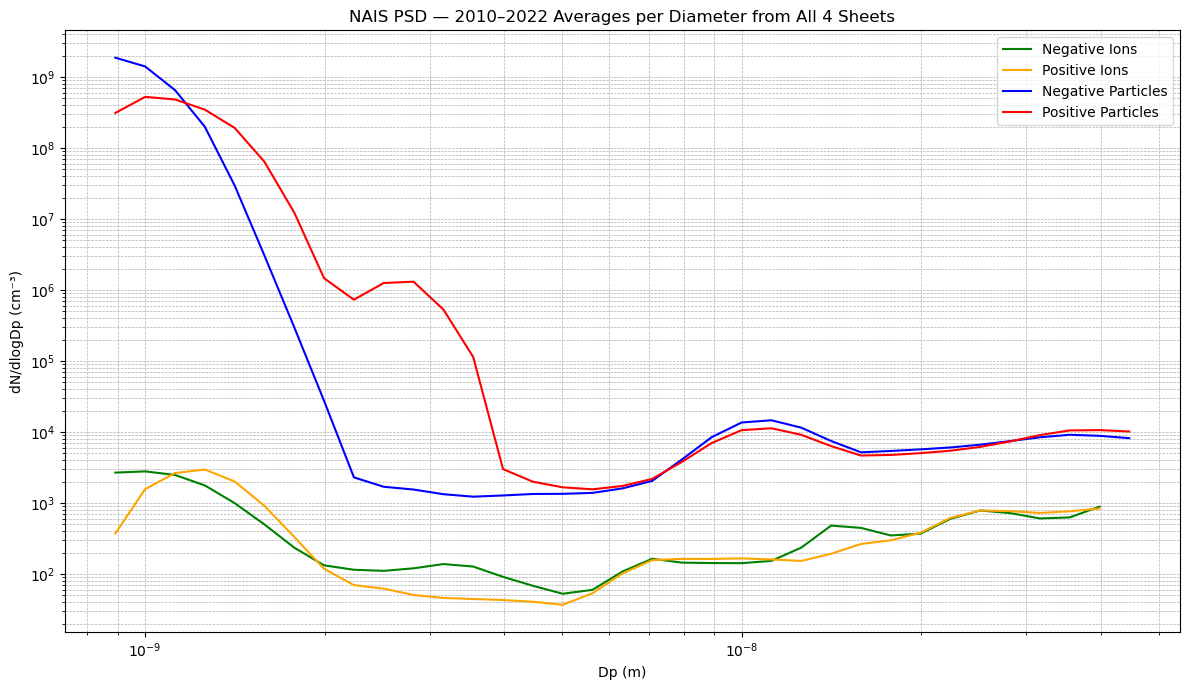

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterSciNotation

# Load the Excel file
file_path = "/Users/touqeergill/Desktop/NAIS (2010-2022) Hourly Avg.xlsx"
xls = pd.ExcelFile(file_path)

# Load all four relevant sheets
df_neg_ions = pd.read_excel(xls, sheet_name="Negative ions")
df_pos_ions = pd.read_excel(xls, sheet_name="Positive ions")
df_neg_particles = pd.read_excel(xls, sheet_name="Negative particles")
df_pos_particles = pd.read_excel(xls, sheet_name="Positive particles")

# Function to clean data and compute average per diameter
def clean_and_average(df):
    df_cleaned = df.dropna(how='all', subset=df.columns[1:])  # Drop rows with all NaNs in diameter columns
    diameters = [float(col) for col in df.columns[1:]]  # Convert string headers to floats (meters)
    means = df_cleaned.iloc[:, 1:].mean()  # Compute mean across all time steps
    return diameters, means

# Apply to all datasets
diam_neg_ions, mean_neg_ions = clean_and_average(df_neg_ions)
diam_pos_ions, mean_pos_ions = clean_and_average(df_pos_ions)
diam_neg_particles, mean_neg_particles = clean_and_average(df_neg_particles)
diam_pos_particles, mean_pos_particles = clean_and_average(df_pos_particles)

# Plotting
plt.figure(figsize=(12, 7))
plt.plot(diam_neg_ions, mean_neg_ions, label="Negative Ions", color="green")
plt.plot(diam_pos_ions, mean_pos_ions, label="Positive Ions", color="orange")
plt.plot(diam_neg_particles, mean_neg_particles, label="Negative Particles", color="blue")
plt.plot(diam_pos_particles, mean_pos_particles, label="Positive Particles", color="red")

# Set log-log scale
plt.xscale("log")
plt.yscale("log")

# Scientific notation on x-axis
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().xaxis.set_major_formatter(LogFormatterSciNotation())

# Axis labels, legend, grid
plt.xlabel("Dp (m)")
plt.ylabel("dN/dlogDp (cm⁻³)")
plt.title("NAIS PSD — 2010–2022 Averages per Diameter from All 4 Sheets")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

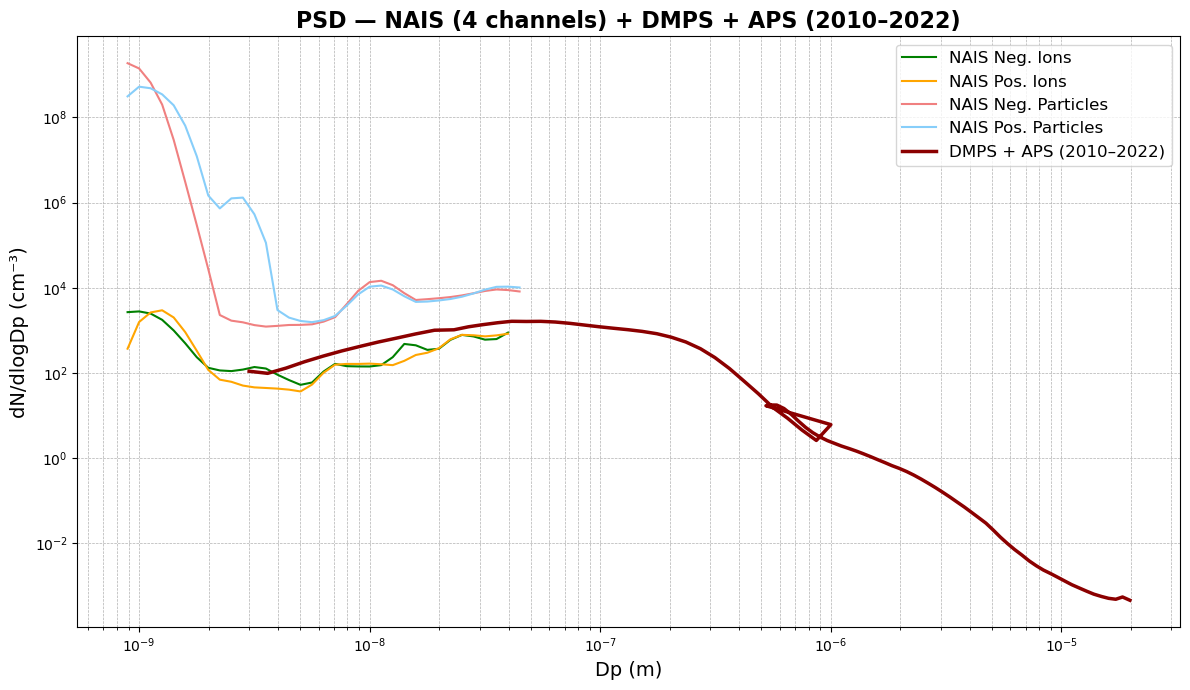

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterSciNotation

# ----------- Load NAIS data from Excel (4 sheets) -----------
nais_file = "/Users/touqeergill/Desktop/NAIS (2010-2022) Hourly Avg.xlsx"
df_neg_ions = pd.read_excel(nais_file, sheet_name="Negative ions")
df_pos_ions = pd.read_excel(nais_file, sheet_name="Positive ions")
df_neg_particles = pd.read_excel(nais_file, sheet_name="Negative particles")
df_pos_particles = pd.read_excel(nais_file, sheet_name="Positive particles")

# Function to clean and compute mean PSD per diameter
def clean_and_average(df):
    df_cleaned = df.dropna(how='all', subset=df.columns[1:])  # Drop rows with all NaNs
    diameters = [float(col) for col in df.columns[1:]]        # Convert column names to float
    means = df_cleaned.iloc[:, 1:].mean()                     # Mean PSD
    return diameters, means

# Compute means for all NAIS channels
diam_neg_ions, mean_neg_ions = clean_and_average(df_neg_ions)
diam_pos_ions, mean_pos_ions = clean_and_average(df_pos_ions)
diam_neg_particles, mean_neg_particles = clean_and_average(df_neg_particles)
diam_pos_particles, mean_pos_particles = clean_and_average(df_pos_particles)

# ----------- Load DMPS + APS data -----------
dmps_aps_file = "/Users/touqeergill/Desktop/2. DMPS + APS Hourly Avg (2010-2022).xlsx"
df_dmps_aps = pd.read_excel(dmps_aps_file, sheet_name="Sheet1")

# Extract and convert diameter columns (skip Date)
dmps_diameters = [float(col) for col in df_dmps_aps.columns[1:]]
dmps_values = df_dmps_aps.iloc[:, 1:]
dmps_mean_psd = dmps_values.mean()  # Mean PSD across all timestamps

# ----------- Plotting -----------
plt.figure(figsize=(12, 7))

# Plot NAIS data
plt.plot(diam_neg_ions, mean_neg_ions, label="NAIS Neg. Ions", color="green")
plt.plot(diam_pos_ions, mean_pos_ions, label="NAIS Pos. Ions", color="orange")
plt.plot(diam_neg_particles, mean_neg_particles, label="NAIS Neg. Particles", color="lightcoral")
plt.plot(diam_pos_particles, mean_pos_particles, label="NAIS Pos. Particles", color="lightskyblue")

# Plot DMPS + APS data
plt.plot(dmps_diameters, dmps_mean_psd, label="DMPS + APS (2010–2022)", color="darkred", linewidth=2.5)

# Log scale and formatting
plt.xscale("log")
plt.yscale("log")
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().xaxis.set_major_formatter(LogFormatterSciNotation())

# Labels, title, legend, grid
plt.xlabel("Dp (m)", fontsize=14)
plt.ylabel("dN/dlogDp (cm⁻³)", fontsize=14)
plt.title("PSD — NAIS (4 channels) + DMPS + APS (2010–2022)", fontsize=16, weight='bold')
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

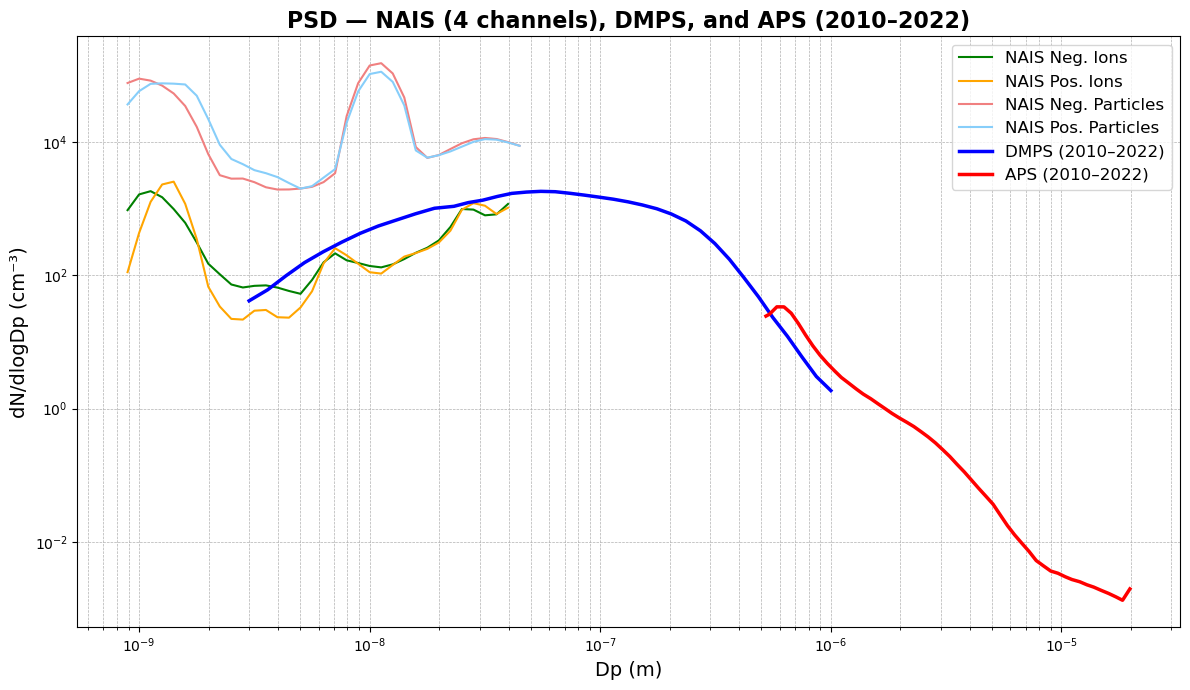

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterSciNotation

# ----------- File Paths -----------
nais_file = "/Users/touqeergill/Desktop/NAIS (2010-2022) Hourly Avg copy 2.xlsx"
dmps_file = "/Users/touqeergill/Desktop/DMPS Hourly Avg (2010-2022).xlsx"
aps_file = "/Users/touqeergill/Desktop/APS Hourly Avg (2010-2022).xlsx"

# ----------- Load NAIS data (4 sheets) -----------
df_neg_ions = pd.read_excel(nais_file, sheet_name="Negative ions")
df_pos_ions = pd.read_excel(nais_file, sheet_name="Positive ions")
df_neg_particles = pd.read_excel(nais_file, sheet_name="Negative particles")
df_pos_particles = pd.read_excel(nais_file, sheet_name="Positive particles")

# Function to clean and compute average
def clean_and_average(df):
    df_cleaned = df.dropna(how='all', subset=df.columns[1:])
    diameters = [float(col) for col in df.columns[1:]]
    means = df_cleaned.iloc[:, 1:].mean()
    return diameters, means

# Process NAIS data
diam_neg_ions, mean_neg_ions = clean_and_average(df_neg_ions)
diam_pos_ions, mean_pos_ions = clean_and_average(df_pos_ions)
diam_neg_particles, mean_neg_particles = clean_and_average(df_neg_particles)
diam_pos_particles, mean_pos_particles = clean_and_average(df_pos_particles)

# ----------- Load and process DMPS data -----------
df_dmps = pd.read_excel(dmps_file)
dmps_diameters = [float(col) for col in df_dmps.columns[1:]]
dmps_mean_psd = df_dmps.iloc[:, 1:].mean()

# ----------- Load and process APS data -----------
df_aps = pd.read_excel(aps_file)
aps_diameters = [float(col) for col in df_aps.columns[1:]]
aps_mean_psd = df_aps.iloc[:, 1:].mean()

# ----------- Plotting -----------
plt.figure(figsize=(12, 7))

# NAIS plots
plt.plot(diam_neg_ions, mean_neg_ions, label="NAIS Neg. Ions", color="green")
plt.plot(diam_pos_ions, mean_pos_ions, label="NAIS Pos. Ions", color="orange")
plt.plot(diam_neg_particles, mean_neg_particles, label="NAIS Neg. Particles", color="lightcoral")
plt.plot(diam_pos_particles, mean_pos_particles, label="NAIS Pos. Particles", color="lightskyblue")

# DMPS and APS plots
plt.plot(dmps_diameters, dmps_mean_psd, label="DMPS (2010–2022)", color="blue", linewidth=2.5)
plt.plot(aps_diameters, aps_mean_psd, label="APS (2010–2022)", color="red", linewidth=2.5)

# Axis scaling and formatting
plt.xscale("log")
plt.yscale("log")
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().xaxis.set_major_formatter(LogFormatterSciNotation())

# Labels and title
plt.xlabel("Dp (m)", fontsize=14)
plt.ylabel("dN/dlogDp (cm⁻³)", fontsize=14)
plt.title("PSD — NAIS (4 channels), DMPS, and APS (2010–2022)", fontsize=16, weight='bold')

# Grid and legend
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

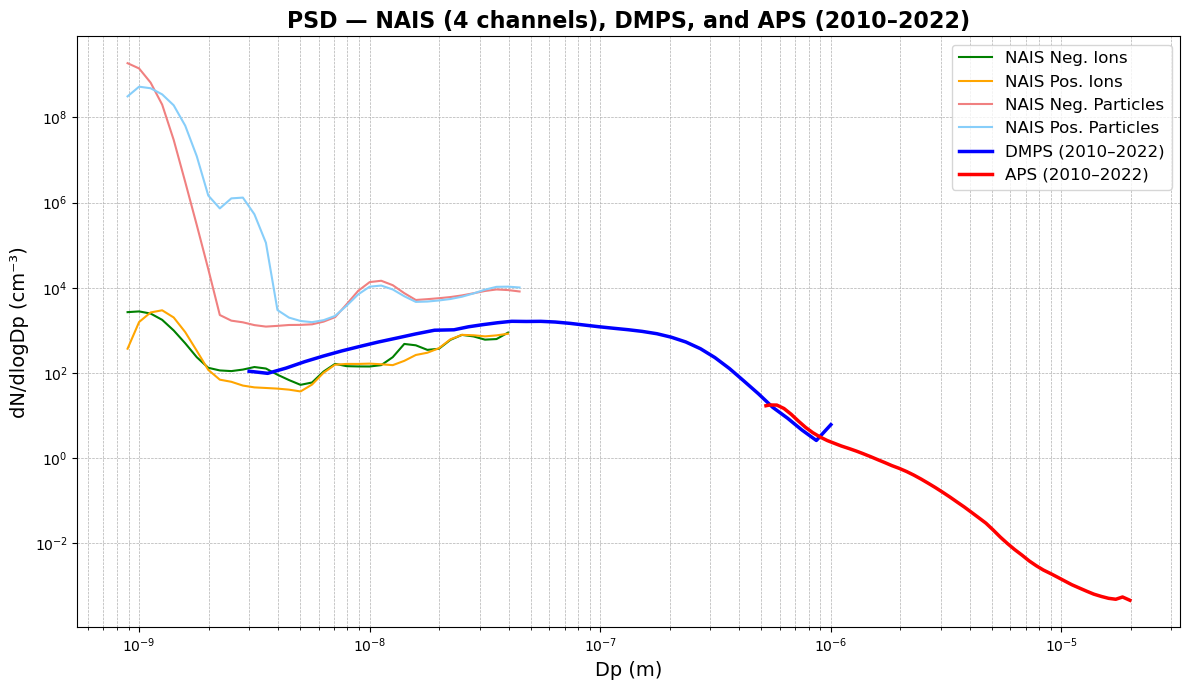

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterSciNotation

# ----------- File Paths -----------
nais_file = "/Users/touqeergill/Desktop/NAIS (2010-2022) Hourly Avg.xlsx"
dmps_file = "/Users/touqeergill/Desktop/DMPS Hourly Avg (2010-2022).xlsx"
aps_file = "/Users/touqeergill/Desktop/APS Hourly Avg (2010-2022).xlsx"

# ----------- Load NAIS data (4 sheets) -----------
df_neg_ions = pd.read_excel(nais_file, sheet_name="Negative ions")
df_pos_ions = pd.read_excel(nais_file, sheet_name="Positive ions")
df_neg_particles = pd.read_excel(nais_file, sheet_name="Negative particles")
df_pos_particles = pd.read_excel(nais_file, sheet_name="Positive particles")

# Function to clean and compute average
def clean_and_average(df):
    df_cleaned = df.dropna(how='all', subset=df.columns[1:])
    diameters = [float(col) for col in df.columns[1:]]
    means = df_cleaned.iloc[:, 1:].mean()
    return diameters, means

# Process NAIS data
diam_neg_ions, mean_neg_ions = clean_and_average(df_neg_ions)
diam_pos_ions, mean_pos_ions = clean_and_average(df_pos_ions)
diam_neg_particles, mean_neg_particles = clean_and_average(df_neg_particles)
diam_pos_particles, mean_pos_particles = clean_and_average(df_pos_particles)

# ----------- Load and process DMPS data -----------
df_dmps = pd.read_excel(dmps_file)
dmps_diameters = [float(col) for col in df_dmps.columns[1:]]
dmps_mean_psd = df_dmps.iloc[:, 1:].mean()

# ----------- Load and process APS data -----------
df_aps = pd.read_excel(aps_file)
aps_diameters = [float(col) for col in df_aps.columns[1:]]
aps_mean_psd = df_aps.iloc[:, 1:].mean()

# ----------- Plotting -----------
plt.figure(figsize=(12, 7))

# NAIS plots
plt.plot(diam_neg_ions, mean_neg_ions, label="NAIS Neg. Ions", color="green")
plt.plot(diam_pos_ions, mean_pos_ions, label="NAIS Pos. Ions", color="orange")
plt.plot(diam_neg_particles, mean_neg_particles, label="NAIS Neg. Particles", color="lightcoral")
plt.plot(diam_pos_particles, mean_pos_particles, label="NAIS Pos. Particles", color="lightskyblue")

# DMPS and APS plots
plt.plot(dmps_diameters, dmps_mean_psd, label="DMPS (2010–2022)", color="blue", linewidth=2.5)
plt.plot(aps_diameters, aps_mean_psd, label="APS (2010–2022)", color="red", linewidth=2.5)

# Axis scaling and formatting
plt.xscale("log")
plt.yscale("log")
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().xaxis.set_major_formatter(LogFormatterSciNotation())

# Labels and title
plt.xlabel("Dp (m)", fontsize=14)
plt.ylabel("dN/dlogDp (cm⁻³)", fontsize=14)
plt.title("PSD — NAIS (4 channels), DMPS, and APS (2010–2022)", fontsize=16, weight='bold')

# Grid and legend
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

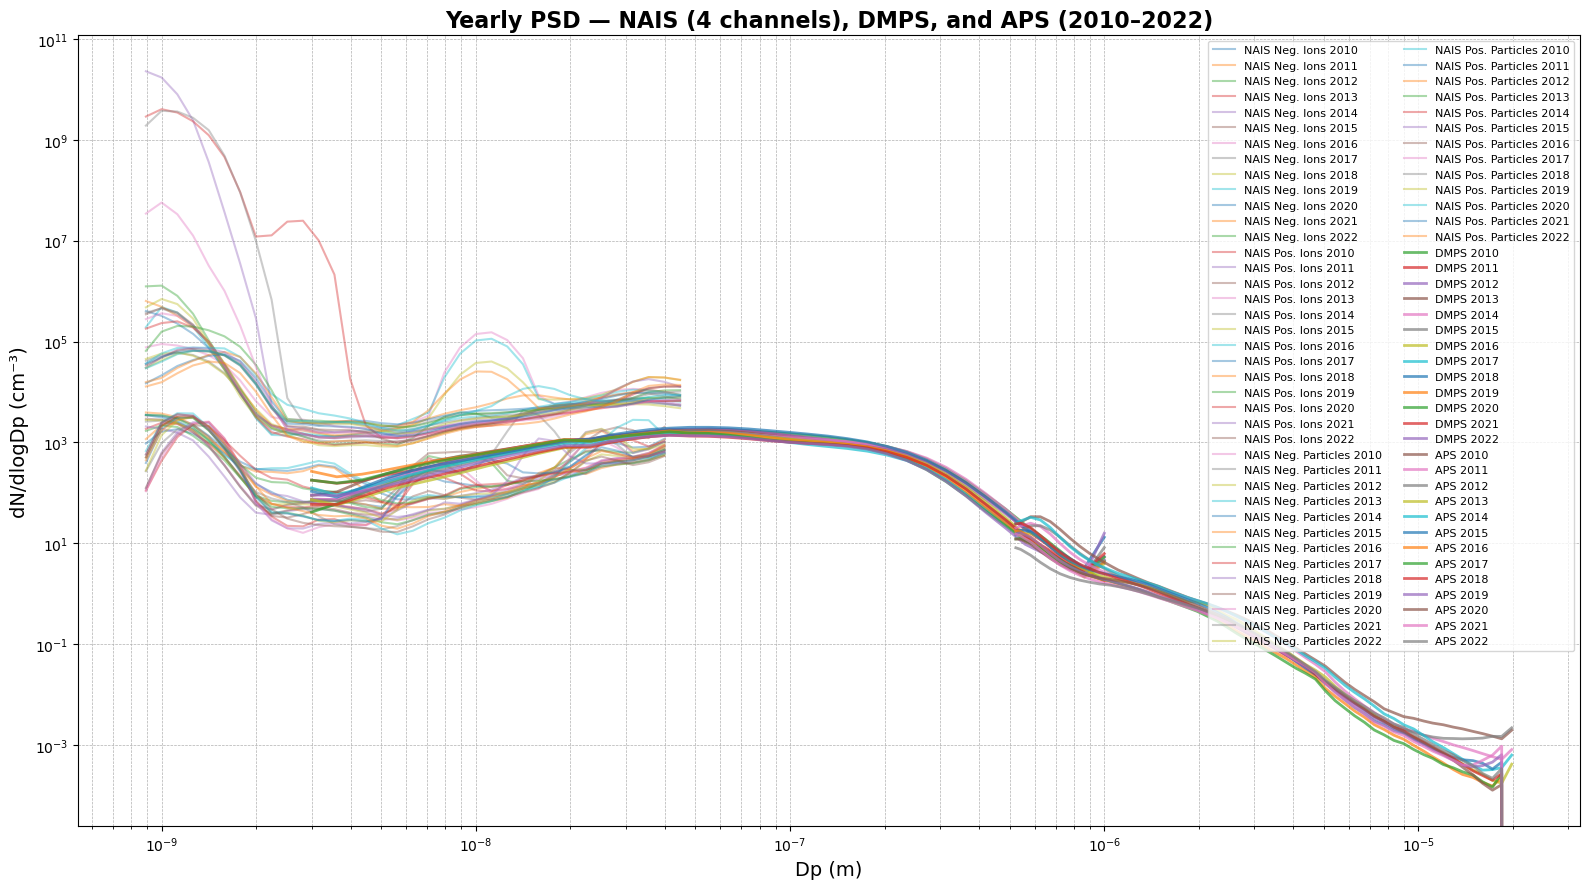

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterSciNotation

# File paths
nais_file = "/Users/touqeergill/Desktop/NAIS (2010-2022) Hourly Avg.xlsx"
dmps_file = "/Users/touqeergill/Desktop/DMPS Hourly Avg (2010-2022).xlsx"
aps_file = "/Users/touqeergill/Desktop/APS Hourly Avg (2010-2022).xlsx"

# Load NAIS data (4 sheets)
df_neg_ions = pd.read_excel(nais_file, sheet_name="Negative ions")
df_pos_ions = pd.read_excel(nais_file, sheet_name="Positive ions")
df_neg_particles = pd.read_excel(nais_file, sheet_name="Negative particles")
df_pos_particles = pd.read_excel(nais_file, sheet_name="Positive particles")

# Load DMPS and APS data
df_dmps = pd.read_excel(dmps_file)
df_aps = pd.read_excel(aps_file)

# Function to process per year
def process_yearly(df):
    df['Year'] = pd.to_datetime(df.iloc[:, 0]).dt.year
    diameters = [float(col) for col in df.columns[1:-1]]  # exclude time and 'Year'
    yearly_means = df.groupby('Year').mean(numeric_only=True)
    return diameters, yearly_means

# Process NAIS channels
nais_data = {
    "NAIS Neg. Ions": df_neg_ions,
    "NAIS Pos. Ions": df_pos_ions,
    "NAIS Neg. Particles": df_neg_particles,
    "NAIS Pos. Particles": df_pos_particles,
}

nais_results = {}
for label, df in nais_data.items():
    diam, yearly = process_yearly(df)
    nais_results[label] = (diam, yearly)

# Process DMPS and APS
dmps_diam, dmps_yearly = process_yearly(df_dmps)
aps_diam, aps_yearly = process_yearly(df_aps)

# Plotting
plt.figure(figsize=(16, 9))

# Plot NAIS data (4 channels)
for label, (diam, yearly_df) in nais_results.items():
    for year in yearly_df.index:
        plt.plot(diam, yearly_df.loc[year], label=f"{label} {year}", alpha=0.4)

# Plot DMPS data
for year in dmps_yearly.index:
    plt.plot(dmps_diam, dmps_yearly.loc[year], label=f"DMPS {year}", linewidth=2, alpha=0.7)

# Plot APS data
for year in aps_yearly.index:
    plt.plot(aps_diam, aps_yearly.loc[year], label=f"APS {year}", linewidth=2, alpha=0.7)

# Axes and formatting
plt.xscale("log")
plt.yscale("log")
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().xaxis.set_major_formatter(LogFormatterSciNotation())

plt.xlabel("Dp (m)", fontsize=14)
plt.ylabel("dN/dlogDp (cm⁻³)", fontsize=14)
plt.title("Yearly PSD — NAIS (4 channels), DMPS, and APS (2010–2022)", fontsize=16, weight='bold')

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=8, loc='upper right', ncol=2)
plt.tight_layout()
plt.show()

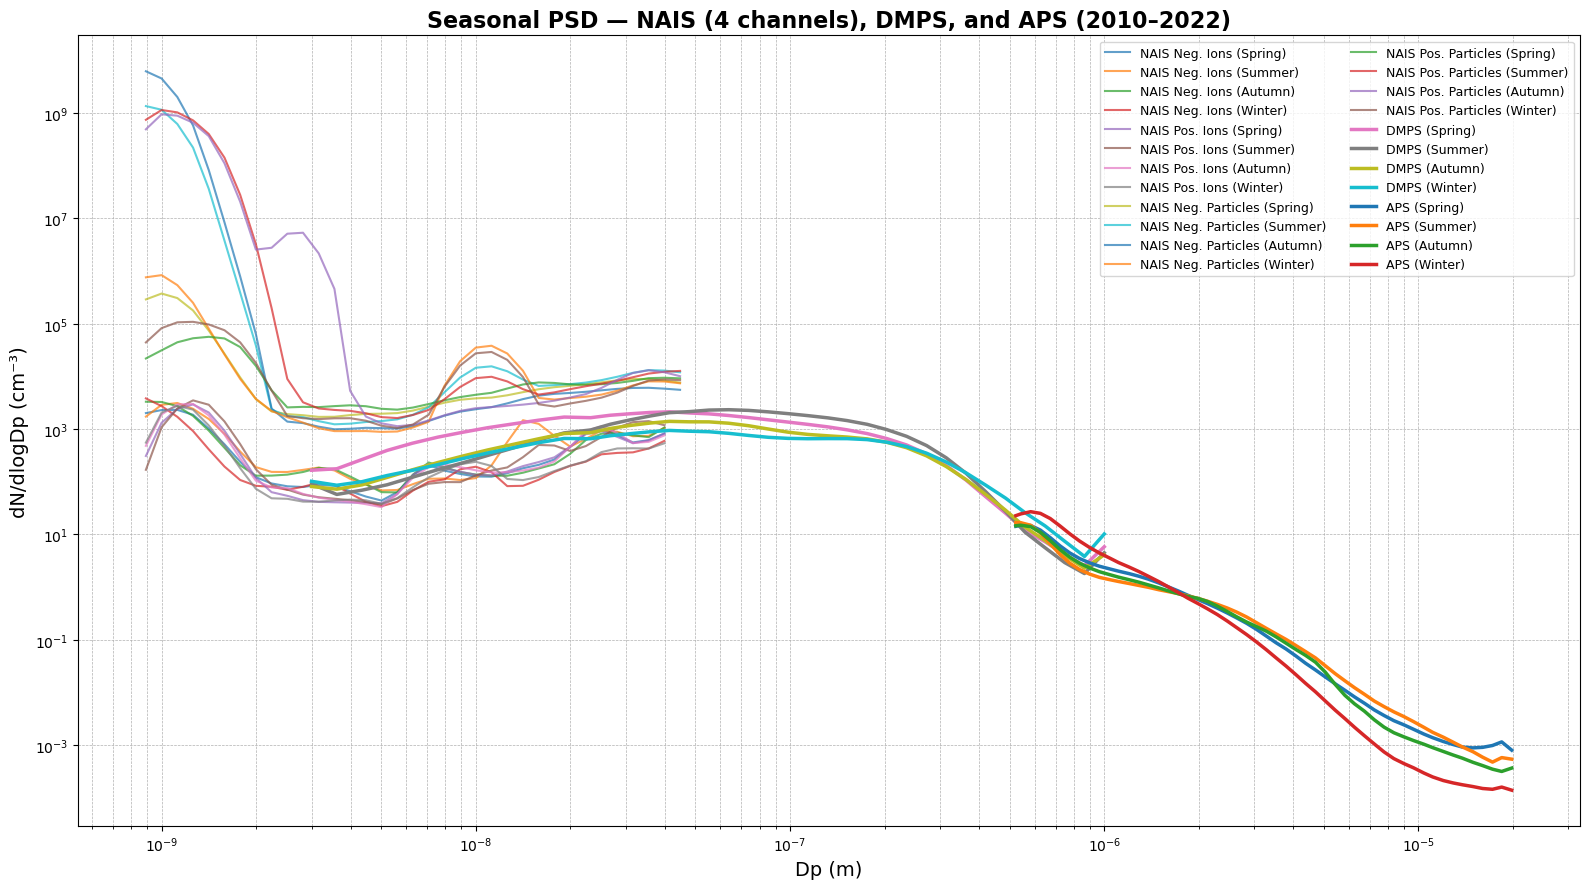

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterSciNotation

# ----------- File Paths -----------
nais_file = "/Users/touqeergill/Desktop/NAIS (2010-2022) Hourly Avg.xlsx"
dmps_file = "/Users/touqeergill/Desktop/DMPS Hourly Avg (2010-2022).xlsx"
aps_file = "/Users/touqeergill/Desktop/APS Hourly Avg (2010-2022).xlsx"

# ----------- Load NAIS data (4 sheets) -----------
df_neg_ions = pd.read_excel(nais_file, sheet_name="Negative ions")
df_pos_ions = pd.read_excel(nais_file, sheet_name="Positive ions")
df_neg_particles = pd.read_excel(nais_file, sheet_name="Negative particles")
df_pos_particles = pd.read_excel(nais_file, sheet_name="Positive particles")

# ----------- Define season mapping function -----------
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# ----------- Process seasonal averages function -----------
def process_seasonal(df):
    df = df.copy()
    df['Datetime'] = pd.to_datetime(df.iloc[:, 0])
    df['Season'] = df['Datetime'].dt.month.map(get_season)
    diameters = [float(col) for col in df.columns[1:-2]]  # exclude time and season columns
    seasonal_means = df.groupby('Season').mean(numeric_only=True)
    return diameters, seasonal_means

# ----------- Process NAIS data -----------
nais_data = {
    "NAIS Neg. Ions": df_neg_ions,
    "NAIS Pos. Ions": df_pos_ions,
    "NAIS Neg. Particles": df_neg_particles,
    "NAIS Pos. Particles": df_pos_particles,
}

nais_results = {}
for label, df in nais_data.items():
    diam, seasonal = process_seasonal(df)
    nais_results[label] = (diam, seasonal)

# ----------- Process DMPS and APS -----------
df_dmps = pd.read_excel(dmps_file)
df_aps = pd.read_excel(aps_file)

dmps_diam, dmps_seasonal = process_seasonal(df_dmps)
aps_diam, aps_seasonal = process_seasonal(df_aps)

# ----------- Plotting -----------
plt.figure(figsize=(16, 9))
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
colors = {
    'Spring': 'green', 'Summer': 'orange', 'Autumn': 'brown', 'Winter': 'blue'
}

# Plot NAIS data
for label, (diam, seasonal_df) in nais_results.items():
    for season in season_order:
        if season in seasonal_df.index:
            plt.plot(diam, seasonal_df.loc[season], label=f"{label} ({season})", alpha=0.7)

# Plot DMPS data
for season in season_order:
    if season in dmps_seasonal.index:
        plt.plot(dmps_diam, dmps_seasonal.loc[season], label=f"DMPS ({season})", linewidth=2.5)

# Plot APS data
for season in season_order:
    if season in aps_seasonal.index:
        plt.plot(aps_diam, aps_seasonal.loc[season], label=f"APS ({season})", linewidth=2.5)

# Axis scaling and formatting
plt.xscale("log")
plt.yscale("log")
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().xaxis.set_major_formatter(LogFormatterSciNotation())

# Labels and title
plt.xlabel("Dp (m)", fontsize=14)
plt.ylabel("dN/dlogDp (cm⁻³)", fontsize=14)
plt.title("Seasonal PSD — NAIS (4 channels), DMPS, and APS (2010–2022)", fontsize=16, weight='bold')

# Grid and legend
plt.legend(fontsize=9, loc='upper right', ncol=2)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

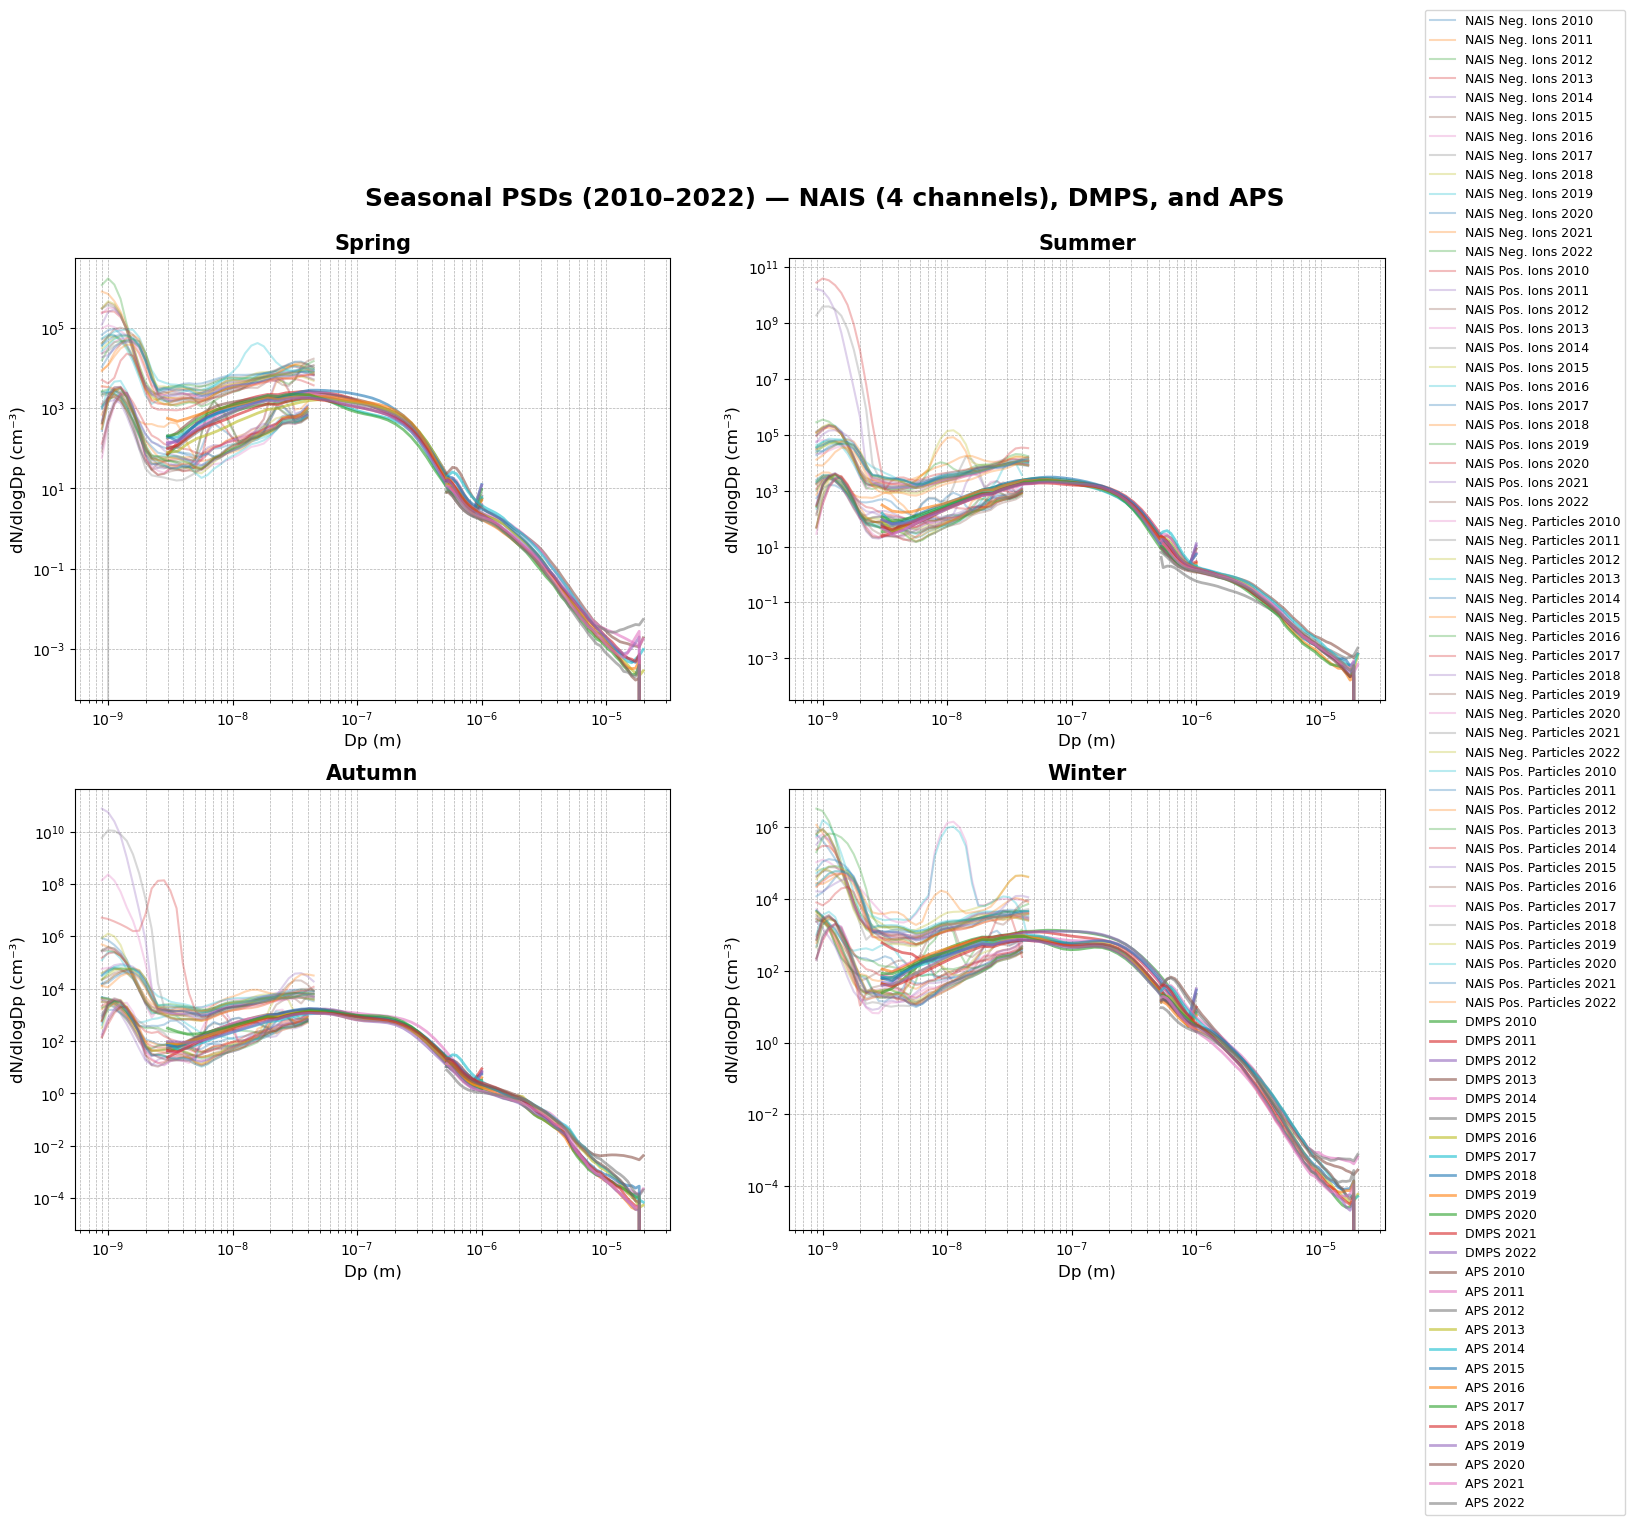

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterSciNotation

# ----------- File Paths -----------
nais_file = "/Users/touqeergill/Desktop/NAIS (2010-2022) Hourly Avg.xlsx"
dmps_file = "/Users/touqeergill/Desktop/DMPS Hourly Avg (2010-2022).xlsx"
aps_file = "/Users/touqeergill/Desktop/APS Hourly Avg (2010-2022).xlsx"

# ----------- Load NAIS data (4 sheets) -----------
df_neg_ions = pd.read_excel(nais_file, sheet_name="Negative ions")
df_pos_ions = pd.read_excel(nais_file, sheet_name="Positive ions")
df_neg_particles = pd.read_excel(nais_file, sheet_name="Negative particles")
df_pos_particles = pd.read_excel(nais_file, sheet_name="Positive particles")

# ----------- Load DMPS and APS -----------
df_dmps = pd.read_excel(dmps_file)
df_aps = pd.read_excel(aps_file)

# ----------- Season mapping -----------
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# ----------- Process by Season-Year -----------
def process_by_season_year(df):
    df = df.copy()
    df['Datetime'] = pd.to_datetime(df.iloc[:, 0])
    df['Year'] = df['Datetime'].dt.year
    df['Season'] = df['Datetime'].dt.month.map(get_season)
    diameters = [float(col) for col in df.columns[1:-3]]  # exclude time, Year, Season
    grouped = df.groupby(['Season', 'Year']).mean(numeric_only=True)
    return diameters, grouped

# ----------- Process NAIS Channels -----------
nais_data = {
    "NAIS Neg. Ions": df_neg_ions,
    "NAIS Pos. Ions": df_pos_ions,
    "NAIS Neg. Particles": df_neg_particles,
    "NAIS Pos. Particles": df_pos_particles,
}

nais_results = {}
for label, df in nais_data.items():
    diam, grouped = process_by_season_year(df)
    nais_results[label] = (diam, grouped)

# ----------- Process DMPS and APS -----------
dmps_diam, dmps_grouped = process_by_season_year(df_dmps)
aps_diam, aps_grouped = process_by_season_year(df_aps)

# ----------- Plotting -----------
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
axs = axs.flatten()

all_handles = []
all_labels = []

for i, season in enumerate(seasons):
    ax = axs[i]
    
    # Plot NAIS
    for label, (diam, df_grouped) in nais_results.items():
        for year in range(2010, 2023):
            if (season, year) in df_grouped.index:
                line, = ax.plot(diam, df_grouped.loc[(season, year)], label=f"{label} {year}", alpha=0.3)
                all_handles.append(line)
                all_labels.append(line.get_label())

    # Plot DMPS
    for year in range(2010, 2023):
        if (season, year) in dmps_grouped.index:
            line, = ax.plot(dmps_diam, dmps_grouped.loc[(season, year)], label=f"DMPS {year}", alpha=0.6, linewidth=2)
            all_handles.append(line)
            all_labels.append(line.get_label())

    # Plot APS
    for year in range(2010, 2023):
        if (season, year) in aps_grouped.index:
            line, = ax.plot(aps_diam, aps_grouped.loc[(season, year)], label=f"APS {year}", alpha=0.6, linewidth=2)
            all_handles.append(line)
            all_labels.append(line.get_label())

    # Formatting
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(f"{season}", fontsize=15, weight='bold')
    ax.set_xlabel("Dp (m)", fontsize=12)
    ax.set_ylabel("dN/dlogDp (cm⁻³)", fontsize=12)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)
    ax.xaxis.set_major_locator(LogLocator(base=10.0))
    ax.xaxis.set_major_formatter(LogFormatterSciNotation())

# Overall title
fig.suptitle("Seasonal PSDs (2010–2022) — NAIS (4 channels), DMPS, and APS", fontsize=18, weight='bold')

# Remove duplicate labels
unique_labels = dict(zip(all_labels, all_handles))

# Adjust layout to make space on the right for legend
plt.subplots_adjust(right=0.78, top=0.92)

# Place legend on the right side (outside)
fig.legend(unique_labels.values(), unique_labels.keys(),
           loc='center left', bbox_to_anchor=(0.80, 0.5),
           ncol=1, fontsize=9, borderaxespad=0.)

plt.show()

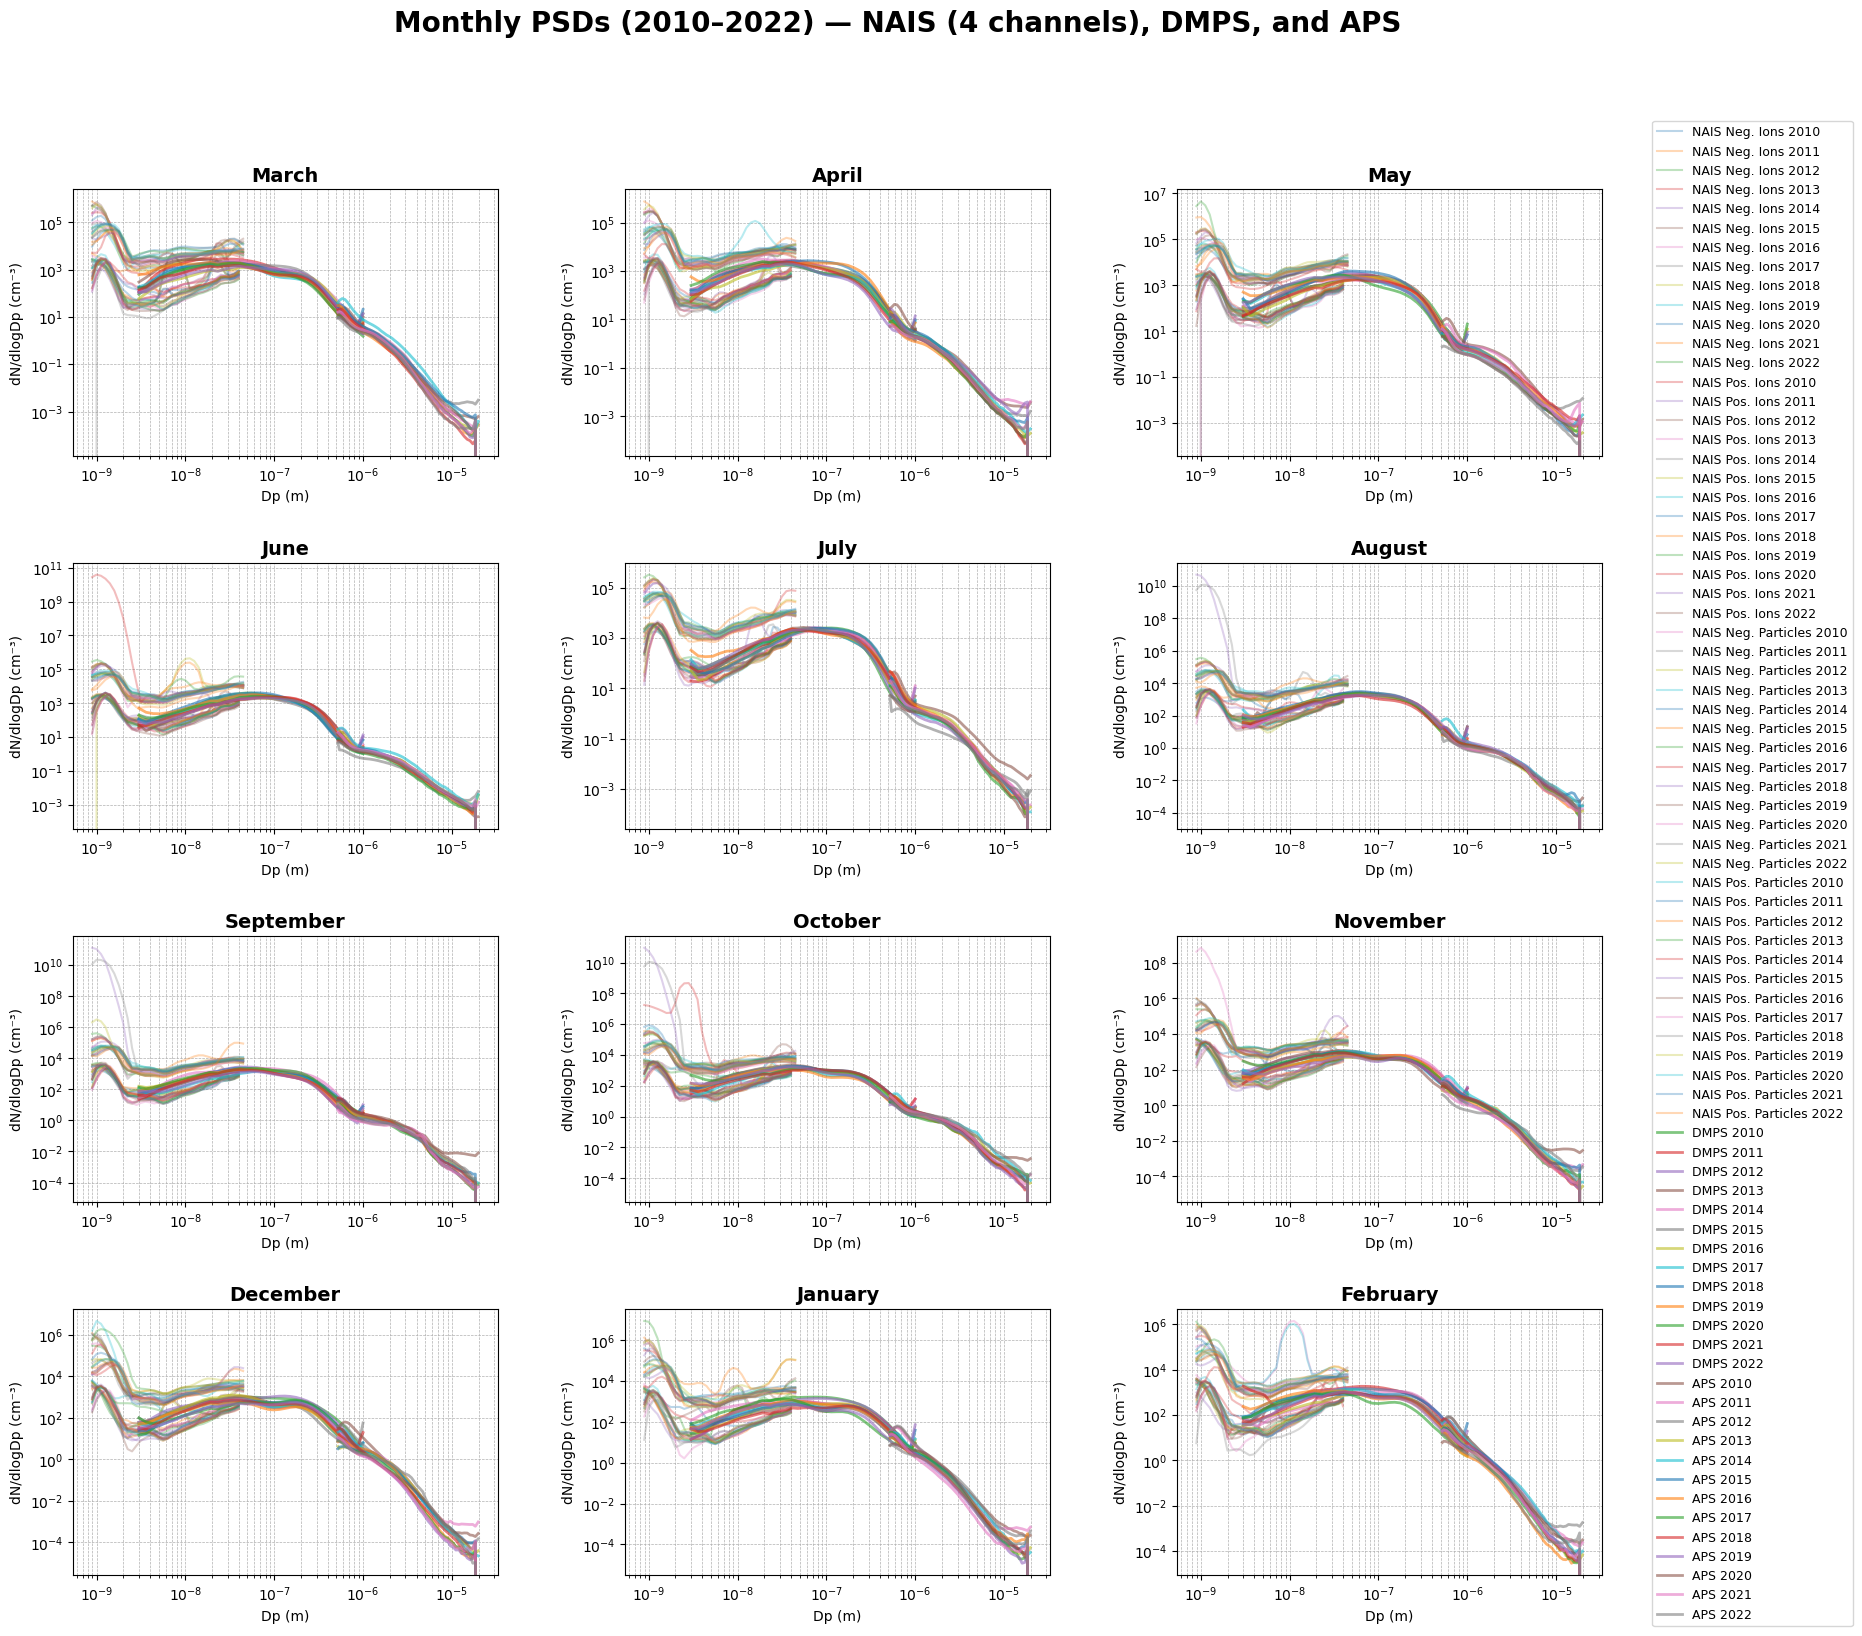

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterSciNotation

# ----------- File Paths -----------
nais_file = "/Users/touqeergill/Desktop/NAIS (2010-2022) Hourly Avg.xlsx"
dmps_file = "/Users/touqeergill/Desktop/DMPS Hourly Avg (2010-2022).xlsx"
aps_file = "/Users/touqeergill/Desktop/APS Hourly Avg (2010-2022).xlsx"

# ----------- Load NAIS data (4 sheets) -----------
df_neg_ions = pd.read_excel(nais_file, sheet_name="Negative ions")
df_pos_ions = pd.read_excel(nais_file, sheet_name="Positive ions")
df_neg_particles = pd.read_excel(nais_file, sheet_name="Negative particles")
df_pos_particles = pd.read_excel(nais_file, sheet_name="Positive particles")

# ----------- Load DMPS and APS -----------
df_dmps = pd.read_excel(dmps_file)
df_aps = pd.read_excel(aps_file)

# ----------- Process by Month-Year -----------
def process_by_month_year(df):
    df = df.copy()
    df['Datetime'] = pd.to_datetime(df.iloc[:, 0])
    df['Year'] = df['Datetime'].dt.year
    df['Month'] = df['Datetime'].dt.month
    diameters = [float(col) for col in df.columns[1:-3]]  # exclude time, Year, Month
    grouped = df.groupby(['Month', 'Year']).mean(numeric_only=True)
    return diameters, grouped

# ----------- Process NAIS Channels -----------
nais_data = {
    "NAIS Neg. Ions": df_neg_ions,
    "NAIS Pos. Ions": df_pos_ions,
    "NAIS Neg. Particles": df_neg_particles,
    "NAIS Pos. Particles": df_pos_particles,
}

nais_results = {}
for label, df in nais_data.items():
    diam, grouped = process_by_month_year(df)
    nais_results[label] = (diam, grouped)

# ----------- Process DMPS and APS -----------
dmps_diam, dmps_grouped = process_by_month_year(df_dmps)
aps_diam, aps_grouped = process_by_month_year(df_aps)

# ----------- Plotting Setup -----------
month_order = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2]
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

fig, axs = plt.subplots(4, 3, figsize=(22, 18))
axs = axs.flatten()

all_handles = []
all_labels = []

for i, month in enumerate(month_order):
    ax = axs[i]
    
    # Plot NAIS data
    for label, (diam, grouped_df) in nais_results.items():
        for year in range(2010, 2023):
            if (month, year) in grouped_df.index:
                line, = ax.plot(diam, grouped_df.loc[(month, year)], label=f"{label} {year}", alpha=0.3)
                all_handles.append(line)
                all_labels.append(line.get_label())

    # Plot DMPS
    for year in range(2010, 2023):
        if (month, year) in dmps_grouped.index:
            line, = ax.plot(dmps_diam, dmps_grouped.loc[(month, year)], label=f"DMPS {year}", alpha=0.6, linewidth=2)
            all_handles.append(line)
            all_labels.append(line.get_label())

    # Plot APS
    for year in range(2010, 2023):
        if (month, year) in aps_grouped.index:
            line, = ax.plot(aps_diam, aps_grouped.loc[(month, year)], label=f"APS {year}", alpha=0.6, linewidth=2)
            all_handles.append(line)
            all_labels.append(line.get_label())

    # Axes formatting
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(month_names[month], fontsize=14, weight='bold')
    ax.set_xlabel("Dp (m)", fontsize=10)
    ax.set_ylabel("dN/dlogDp (cm⁻³)", fontsize=10)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)
    ax.xaxis.set_major_locator(LogLocator(base=10.0))
    ax.xaxis.set_major_formatter(LogFormatterSciNotation())

# Overall figure layout
fig.suptitle("Monthly PSDs (2010–2022) — NAIS (4 channels), DMPS, and APS", fontsize=20, weight='bold')

# Remove duplicate legend entries
unique_labels = dict(zip(all_labels, all_handles))

# Adjust layout for legend on right
plt.subplots_adjust(right=0.82, hspace=0.4, wspace=0.3)

# External legend
fig.legend(unique_labels.values(), unique_labels.keys(),
           loc='center left', bbox_to_anchor=(0.84, 0.5),
           ncol=1, fontsize=9)

plt.show()